# Chapter 4, example 4

In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt

from sklearn import datasets

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

In [2]:
no_epochs = 2500
lr = 0.5

SEED = 100
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
no_inputs = 4
no_outputs = 3

# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

no_data = len(iris.data)

X = iris.data

# convert the targets into one-hot matrix
Y = np.zeros((no_data, no_outputs))
for i in range(no_data):
    Y[i, iris.target[i]] = 1
    
print(np.shape(X))
print(np.shape(Y))

(150, 4)
(150, 3)


In [4]:
class SoftmaxLayer():
  def __init__(self, no_inputs, no_outputs):
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(w_init(shape=(no_inputs,no_outputs), dtype=tf.float64))
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(b_init(shape=(no_outputs), dtype=tf.float64))

  def __call__(self, x):
    u = tf.matmul(x, self.w) + self.b
    return tf.exp(u)/tf.reduce_sum(tf.exp(u), axis=1, keepdims=True)

In [5]:
def loss(targets, logits):
  t_float = tf.cast(targets, tf.float64)
  losses = -tf.reduce_mean(tf.reduce_sum(tf.math.log(logits)*targets, axis=1))
  class_err = tf.reduce_sum(tf.cast(tf.not_equal(tf.argmax(logits, axis=1), tf.argmax(targets, axis=1)), dtype=tf.int32))
  return losses, class_err

In [6]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss, current_err = loss(outputs, model(inputs))
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign(model.w - learning_rate * dw)
  model.b.assign(model.b - learning_rate * db)

In [7]:
model = SoftmaxLayer(no_inputs, no_outputs)

print(model.w.numpy(), model.b.numpy())

[[ 0.00470517  0.00424244 -0.0228833 ]
 [-0.0086293  -0.03198624  0.05250187]
 [ 0.10071415 -0.00131456 -0.00903195]
 [-0.01193019 -0.04326576 -0.04804788]] [0. 0. 0.]


In [8]:
entropy, err = [], []
for epoch in range(no_epochs):
  entropy_, err_ = loss(Y, model(X))
  entropy.append(entropy_), err.append(err_)
  
  train(model, X, Y, learning_rate=lr)

  if epoch%100 == 0:
      print('Epoch %2d:  loss=%2.5f:  error=%3d'%(epoch, entropy[-1], err[-1]))

entropy_, err_ = loss(Y, model(X))
print('test error=%3d'%err_)

Epoch  0:  loss=1.20477:  error=140
Epoch 100:  loss=0.16400:  error=  5
Epoch 200:  loss=0.11847:  error=  4
Epoch 300:  loss=0.09852:  error=  3
Epoch 400:  loss=0.08708:  error=  3
Epoch 500:  loss=0.07958:  error=  2
Epoch 600:  loss=0.07424:  error=  2
Epoch 700:  loss=0.07023:  error=  2
Epoch 800:  loss=0.06710:  error=  2
Epoch 900:  loss=0.06459:  error=  2
Epoch 1000:  loss=0.06252:  error=  2
Epoch 1100:  loss=0.06078:  error=  3
Epoch 1200:  loss=0.05930:  error=  3
Epoch 1300:  loss=0.05802:  error=  3
Epoch 1400:  loss=0.05690:  error=  3
Epoch 1500:  loss=0.05592:  error=  3
Epoch 1600:  loss=0.05504:  error=  3
Epoch 1700:  loss=0.05426:  error=  3
Epoch 1800:  loss=0.05355:  error=  3
Epoch 1900:  loss=0.05291:  error=  3
Epoch 2000:  loss=0.05233:  error=  3
Epoch 2100:  loss=0.05179:  error=  3
Epoch 2200:  loss=0.05130:  error=  3
Epoch 2300:  loss=0.05085:  error=  3
Epoch 2400:  loss=0.05043:  error=  3
test error=  3


In [9]:
# print learned weights
print('w: %s, b: %s'%(model.w.numpy(), model.b.numpy()))

w: [[-5.64468184e-01  1.29034580e+00 -7.39813302e-01]
 [ 2.43509283e+00  1.08464962e-03 -2.42429116e+00]
 [-5.19366825e+00 -2.52485178e-01  5.53652107e+00]
 [-2.38732752e+00 -2.88848158e+00  5.17256527e+00]], b: [-0.98272709  5.52615415 -4.54342706]


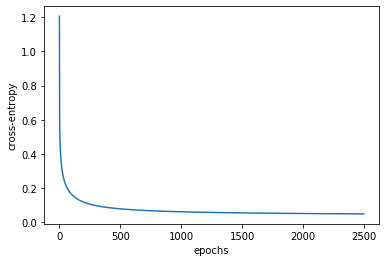

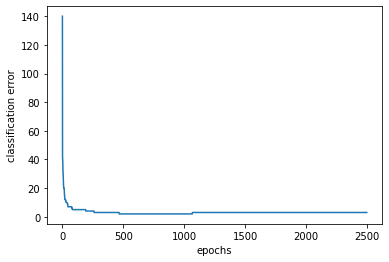

In [10]:
# plot learning curves
plt.figure(2)
plt.plot(range(no_epochs), entropy)
plt.xlabel('epochs')
plt.ylabel('cross-entropy')
plt.savefig('./figures/4.4_1.png')

plt.figure(3)
plt.plot(range(no_epochs), np.array(err))
plt.xlabel('epochs')
plt.ylabel('classification error')
plt.savefig('./figures/4.4_2.png')